[*********************100%***********************]  2 of 2 completed


started at 10000, ended at 10216.091622221797


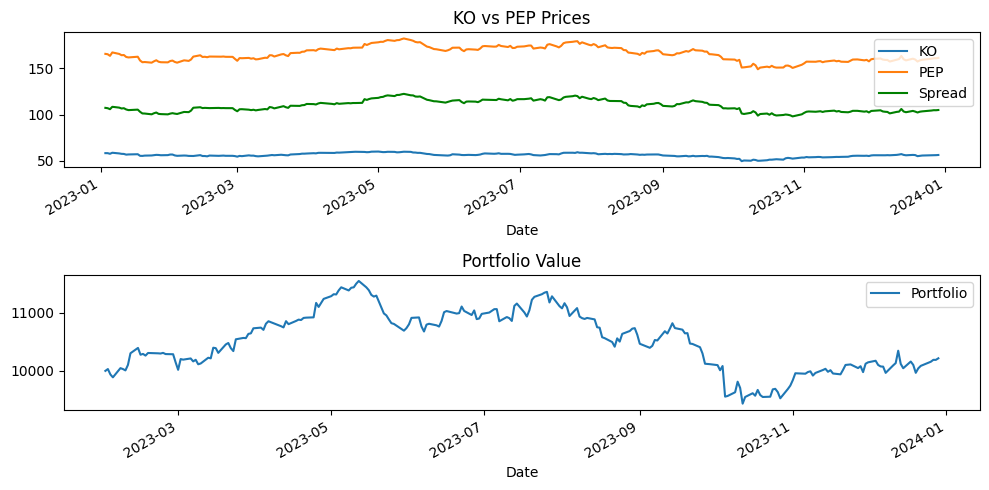

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

def loadData(code1="KO", code2="PEP", start="2023-01-01", end="2024-01-01"):

    data = yf.download([code2, code1], start, end)["Close"]
    spread = data[code2] - data[code1]

    return data, spread, code1, code2

def signals(data, spread, code1, code2):
    spread_mew = spread.rolling(window=20).mean()
    spread_sigma = spread.rolling(window=20).std()
    data["Mew"] = spread_mew
    data["Sigma"] = spread_sigma
    data["Spread"] = spread
    return data, code1, code2

In [ ]:

def backtest(data, code1, code2):
    cash = 10000
    a_stocks = 0
    b_stocks = 0

    for date, row in data.iterrows():
        if pd.isna(row["Mew"]) or pd.isna(row["Spread"]):
            continue

        mew = row["Mew"]
        sigma = row["Sigma"]
        spread = row["Spread"]
        a_price = row[code1]
        b_price = row[code2]

        if spread > (mew + 2 * sigma):
            cash += a_stocks*a_price
            a_stocks = 0
            b_stocks += cash/b_price
            cash = 0
        if spread < (mew - 2 * sigma):
            cash += b_stocks*b_price
            b_stocks = 0
            a_stocks += cash/a_price
            cash = 0

        value = a_stocks*a_price + b_stocks*b_price + cash
        data.loc[date, "Portfolio"] = value

    spread = data["Spread"]

    print(f"started at 10000, ended at {value}")

    return data, code1, code2


In [ ]:
def graph(data, code1, code2):
    plt.figure(figsize=(10, 5))

    # plot 1
    plt.subplot(2, 1, 1) 
    data[code1].plot(title="KO vs PEP Prices", ax=plt.gca()) 
    data[code2].plot(ax=plt.gca(), label='PEP') 
    spread= data["Spread"]
    spread.plot(ax=plt.gca(), label='Spread', color='green')
    plt.legend([code1, code2, 'Spread'])

    # Plot 2
    plt.subplot(2, 1, 2) 
    portfolio = data["Portfolio"] 
    portfolio.plot(title="Portfolio Value", ax=plt.gca())
    plt.legend(['Portfolio'])

    plt.tight_layout()
    plt.show()

In [ ]:
data, spread, code1, code2 = loadData()
data, code1, code2 = signals(data, spread, code1, code2)
data, code1, code2 = backtest(data, code1, code2)
graph(data, code1, code2)